<a href="https://colab.research.google.com/github/samvaadi/AI-ML/blob/main/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data seperation as X and y**

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


In [ ]:
y = df['logS']
y

,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


In [ ]:
X= df.drop('logS',axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=1)
X_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
226,1.74850,68.119,1.0,0.000000
774,2.66980,154.253,4.0,0.000000
683,3.61302,278.335,5.0,0.375000
535,1.31140,100.161,0.0,0.000000
335,-0.06520,182.179,2.0,0.000000
...,...,...,...,...
715,2.50850,197.381,0.0,0.000000
905,0.10710,219.266,1.0,0.000000
1096,2.99000,246.359,7.0,0.000000
235,2.05240,72.151,1.0,0.000000


In [ ]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train,y_train)
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
lr_train_mse = mean_squared_error(y_train,y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test,y_lr_test_pred)

lr_train_r2 = r2_score(y_train,y_lr_train_pred)
lr_test_r2 = r2_score(y_test,y_lr_test_pred)

print('LR MSE (train):',lr_train_mse)
print('LR MSE (test):',lr_test_mse)
print('LR r2 (train):',lr_train_r2)
print('LR r2 (test):',lr_test_r2)


LR MSE (train): 1.0319001655962687
LR MSE (test): 0.928446901991146
LR r2 (train): 0.759261410096104
LR r2 (test): 0.8069700081041057


In [ ]:
lr_results = pd.DataFrame(['Linear Regreesion',lr_train_mse,lr_test_mse,lr_train_r2,lr_test_r2]).transpose()
lr_results.columns = ['Method','Training MSE','Testing MSE','Training R2','Testing R2']
lr_results

,Method,Training MSE,Testing MSE,Training R2,Testing R2
0,Linear Regreesion,1.0319,0.928447,0.759261,0.80697


**Random forests**

In [ ]:
from  sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2,random_state=5)
rf.fit(X_train,y_train)
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
rf_train_mse = mean_squared_error(y_train,y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test,y_rf_test_pred)
rf_train_r2 = r2_score(y_train,y_rf_train_pred)
rf_test_r2 = r2_score(y_test,y_rf_test_pred)

In [ ]:
rf_results = pd.DataFrame(['Random forests',rf_train_mse,rf_test_mse,rf_train_r2,rf_test_r2]).transpose()
rf_results.columns = ['Method','Training MSE','Testing MSE','Training R2','Testing R2']
rf_results

,Method,Training MSE,Testing MSE,Training R2,Testing R2
0,Random forests,1.051005,1.036191,0.754804,0.784569


In [ ]:
df_models = pd.concat([lr_results,rf_results],axis=0).reset_index()
df_models.drop(['index'],axis=1,inplace=True)
df_models

,Method,Training MSE,Testing MSE,Training R2,Testing R2
0,Linear Regreesion,1.0319,0.928447,0.759261,0.80697
1,Random forests,1.051005,1.036191,0.754804,0.784569


Text(0, 0.5, 'Predicted logS')

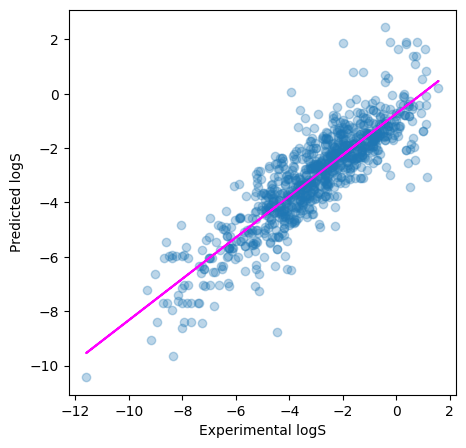

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train,y=y_lr_train_pred,alpha=0.3)

z= np.polyfit(y_train,y_lr_train_pred,1)
p= np.poly1d(z)
plt.plot(y_train,p(y_train),color='magenta')
plt.xlabel('Experimental logS')
plt.ylabel('Predicted logS')
